# We want to analyze various properties of a text using NLP algorithms

In [ ]:
import nltk
import spacy
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Stop word = mot commun
nltk.download('stopwords')

# Sur le site de spacy, on peut trouver des modèles adaptés à la langue du texte
# Que l'on veut traiter (ici anglais donc en_core_web_sm)
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
texte = "Homer Jay Simpson is a fictional character and one of the main protagonists of the American animated sitcom The Simpsons. He is voiced by Dan Castellaneta and first appeared on television, along with the rest of his family, in The Tracey Ullman Show short \"Good Night\" on April 19, 1987. Homer was created and designed by cartoonist Matt Groening while he was waiting in the lobby of James L. Brooks' office. Groening had been called to pitch a series of shorts based on his comic strip Life in Hell but instead decided to create a new set of characters. He named the character after his father, Homer Groening. After appearing for three seasons on The Tracey Ullman Show, the Simpson family got their own series on Fox, which debuted December 17, 1989.\
As patriarch of the eponymous family, Homer and his wife Marge have three children: Bart, Lisa and Maggie. As the family's provider, he works at the Springfield Nuclear Power Plant as safety inspector. Homer embodies many American working class stereotypes: he is obese, immature, outspoken, aggressive, balding, lazy, ignorant, unprofessional, and addicted to beer, junk food and watching television. However, he is fundamentally a good man and is staunchly protective of his family, especially when they need him the most. Despite the suburban blue-collar routine of his life, he has had a number of remarkable experiences, including going to space, climbing the tallest mountain in Springfield by himself, fighting former President George H. W. Bush and winning a Grammy Award as a member of a barbershop quartet.\
In the shorts and earlier episodes, Castellaneta voiced Homer with a loose impression of Walter Matthau; however, during the second and third seasons of the half-hour show, Homer's voice evolved to become more robust, to allow the expression of a fuller range of emotions. He has appeared in other media relating to The Simpsons—including video games, The Simpsons Movie, The Simpsons Ride, commercials, and comic books—and inspired an entire line of merchandise. His signature catchphrase, the annoyed grunt \"D'oh!\", has been included in The New Oxford Dictionary of English since 1998 and the Oxford English Dictionary since 2001.\
Homer is one of the most influential characters in the history of television, and is widely considered to be an American cultural icon. The British newspaper The Sunday Times described him as \"The greatest comic creation of [modern] time\". He was named the greatest character \"of the last 20 years\" in 2010 by Entertainment Weekly, was ranked the second-greatest cartoon character by TV Guide, behind Bugs Bunny, and was voted the greatest television character of all time by Channel 4 viewers. For voicing Homer, Castellaneta has won four Primetime Emmy Awards for Outstanding Voice-Over Performance and a special-achievement Annie Award. In 2000, Homer and his family were awarded a star on the Hollywood Walk of Fame. "

# Starting by cleaning the text (removing unnecessary informations)

In [ ]:
# .strip() : supprime tous les espaces (même multiples)
# ex: texte = "  salut    " => texte.strip() = "salut"

# On met if len()>1 pour eviter des créer des phrases "vides" ou avec juste des lettres
# ex: George H. W. Bush => on va avoir une "phrase" avec juste W
phrases = [p.strip() for p in texte.split('.') if len(p)>2]
phrases

In [ ]:
liste_mots=[]
for p in phrases:
  for m in p.split():
    liste_mots.append(m)
  
liste_mots

In [ ]:
# pd.Series = dataframe de 1 seule colonne
pd.Series(liste_mots)

# visualizing the frequency of each word


*   First without any treatment to the text



In [ ]:
frequency = pd.Series(liste_mots).value_counts()[:50]

In [ ]:
# Récuperer les mots
frequency.index

# Récuperer la valeur
frequency.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


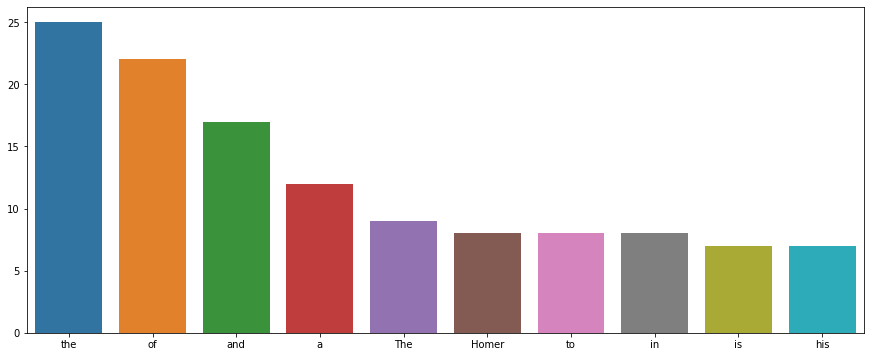

In [ ]:
plt.figure(figsize = (15,6))
frequency = pd.Series(liste_mots).value_counts()[:10]
sns.barplot(frequency.index, frequency.values)
plt.show()

* Next by taking out stop words and punctuation to get important informations

In [ ]:
# On lui donne une liste de phrases et on va supprimer la ponctuation et les majuscules
def nettoyage(phrase):
  p = ''
  for element in phrase:
    if element not in ['.',',','-','"','?','!','/','\'','_']:
      p += element.lower()
  return p
  

In [ ]:
mots_communs = nltk.corpus.stopwords.words('english')

In [ ]:
# Cleaning the words list by removing stop words and punctuation
liste_mots_propre = [nettoyage(mot) for mot in liste_mots]
liste_mots_propre = [mot for mot in liste_mots_propre if mot not in mots_communs]
liste_mots_propre

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


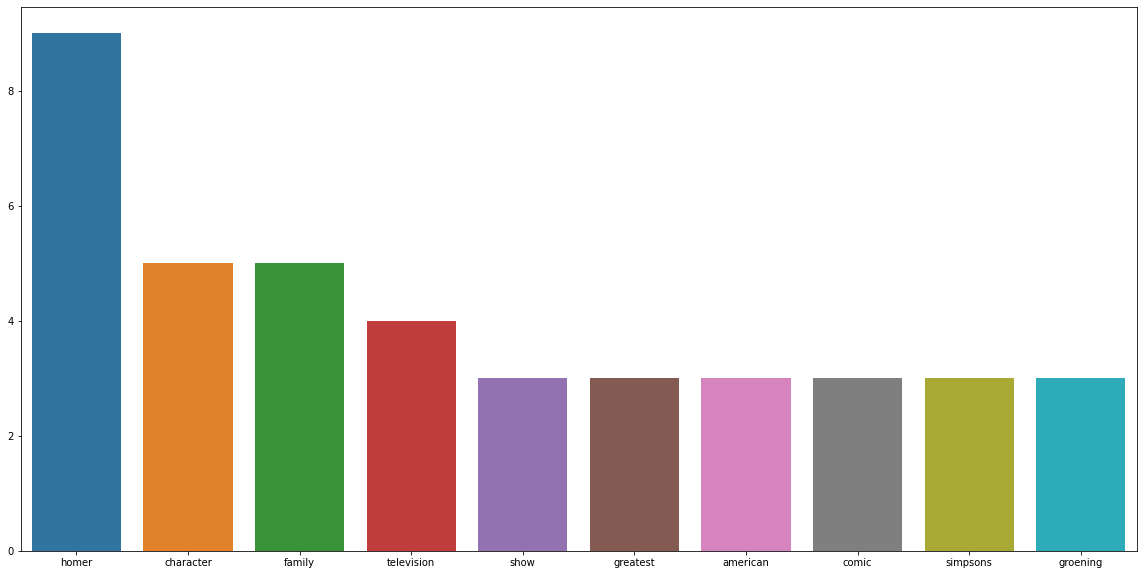

In [ ]:
plt.figure(figsize=(20,10))
freq= pd.Series(liste_mots_propre).value_counts()[:10]
sns.barplot(freq.index, freq.values)
plt.show()

In [ ]:
# nlp va retrouver la racine des mots
exemple_tokens = nlp(' '.join(['am','running','ran','computed']))

In [ ]:
# .lemma_ : lemmatisation des mots (trouver leur racine)
# Racine de am : be
racines=[]
for m in range(len(exemple_tokens)):
  racines.append(exemple_tokens[m].lemma_)

racines

['be', 'run', 'run', 'compute']

In [ ]:
# Getting the root of every word
token_liste_propre = nlp(' '.join(liste_mots_propre))
racines_mots = []
for m in token_liste_propre:
  racines_mots.append(m.lemma_)

racines_mots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


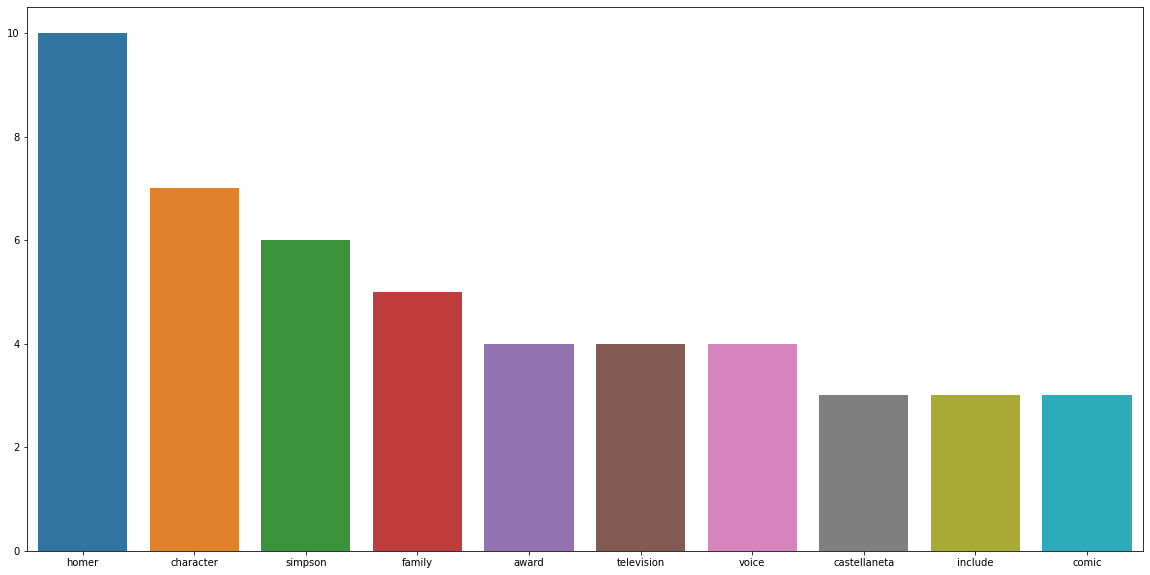

In [ ]:
plt.figure(figsize=(20,10))
freq = pd.Series(racines_mots).value_counts()[:10]
sns.barplot(freq.index, freq.values)
plt.show()

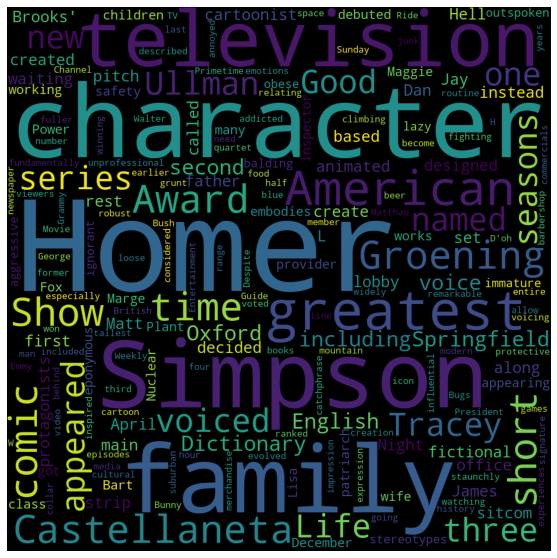

In [ ]:
# Generating a word cloud from the text
nuage_mots = WordCloud(width=1000, height=1000)
nuage_mots.generate_from_text(texte)

plt.figure(figsize=(20,10))
plt.imshow(nuage_mots)
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

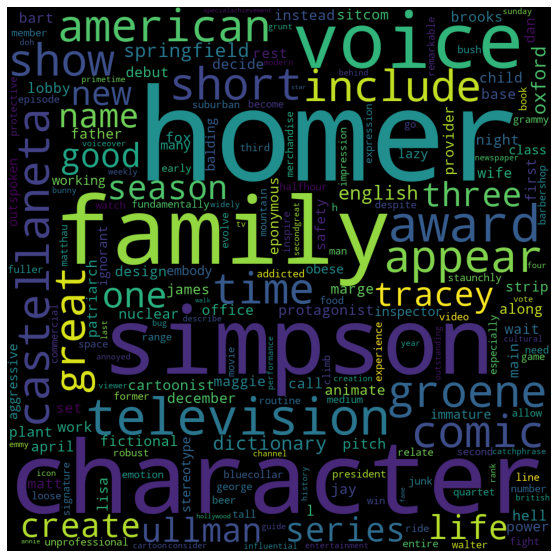

In [ ]:
# Same word cloud but from the cleaned text
texte_propre = ' '.join(racines_mots)
nuage_mots = WordCloud(width=1000, height=1000)
nuage_mots.generate_from_text(texte_propre)

plt.figure(figsize=(20,10))
plt.imshow(nuage_mots)
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

#Sentiment analysis
- Making of a bag of words


In [ ]:
datas = pd.read_csv('https://raw.githubusercontent.com/BriceNW/datasets_and_others/main/Emotion_final.csv')
datas

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [ ]:
datas.Emotion.value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [ ]:
# Splitting all emotions into only 2: happyness and sadness
df_emotions = datas[datas.Emotion.isin(['happy','sadness'])]

In [ ]:
df_emotions.Emotion.value_counts()

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

import string #Contains a list of punctuation symbols
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
# Cleaning function
def nettoyage(texte):
  lemmatizer = nltk.WordNetLemmatizer()
  # Splitting the text into words
  tokens = word_tokenize(texte)
  # Deletting what contains 1 digit or more
  tokens = [re.sub("\d+","",t) for t in tokens]
  # Deletting punctuation and numbers
  chiffres_ponctuations = list(string.punctuation)+list(string.digits)
  chiffres_ponctuations.append('')
  tokens = [t.lower() for t in tokens if t not in chiffres_ponctuations]
  # Deletting stop words
  tokens = [t for t in tokens if t not in mots_communs]
  # Getting the root of every word
  racines = [lemmatizer.lemmatize(t) for t in tokens]
  resultat = ' '.join(racines)
  return resultat

In [ ]:
exemple = 'i feel, like i have 3 ? to Make the suffering ! i m SEeing mean SomeThing 1083'
nettoyage(exemple)

'feel like make suffering seeing mean something'

In [ ]:
# Cleaning the dataset
df_emotions['texte_clean']=df_emotions['Text'].apply(nettoyage)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_emotions[['texte_clean']]
y = df_emotions.Emotion

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=45, stratify = y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(max_features=1000).fit(X_train)

In [ ]:
X_train_vectors = vectorizer.transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
X_train_vectors

<1x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.vocabulary_

#TF-IDF Method

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfvectorizer = TfidfVectorizer(max_features=1000).fit(X_train)

In [ ]:
X_train_tfvectors = tfidfvectorizer.transform(X_train)
X_test_tfvectors = tfidfvectorizer.transform(X_test)

In [ ]:
model.fit(X_train_vectors, y_train)

ValueError: ignored